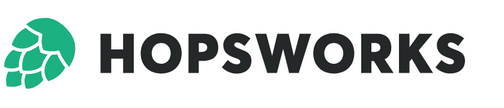

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
!pip install -U hopsworks --quiet

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

/opt/anaconda3/envs/bds-mlops/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/550040
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2024-03-25 09:44:14.003252
2024-03-26 09:44:14.003292


In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [5]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `camillah_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `camillah_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_mstd`, 

In [6]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

Finished: Reading data from Hopsworks, using ArrowFlight (17.73s) 


,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,665867723edab56a852b065ca9055216,1711360110000,4007444234897432,1,0.009815,0.777738,0.771513,0.241175,0.009612,0.007794,0.007153,0.007153,0.189189
1,44f01c2ea7fad04d89f2f6c1f68ce846,1711361333000,4007444234897432,5,0.005134,0.779919,0.330423,0.191836,0.008493,0.000000,NaN,NaN,NaN
2,d500115806542268dfd4e41f2084bce5,1711365889000,4007444234897432,6,0.004755,0.777740,0.771477,0.176141,0.005373,0.008673,0.008032,0.008032,0.198526
3,551e53954238e0ea9ee505b492b819f5,1711366439000,4007444234897432,1,0.005356,0.779921,0.330391,0.002458,0.000833,0.000000,NaN,NaN,NaN
4,241c4504da34039f63d406c8109b1c00,1711366940000,4007444234897432,1,0.001067,0.779921,0.330388,0.076377,0.002305,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64452,70a22ef4e36ef9fdad815c3a405536e4,1711434455000,4991539658091830,2,0.259105,0.879660,0.410995,0.174569,0.008618,0.128161,0.127597,0.127597,0.231169
64453,e96626b95200eeb5311e56e2d7192dac,1711439636000,4991539658091830,6,0.002409,0.879662,0.410962,0.483852,0.001900,0.124773,0.124208,0.124208,0.381917
64454,fbf06fd2f40e591e46d8d12a1a65c595,1711440778000,4991539658091830,6,0.008184,0.879662,0.410955,0.097549,0.000940,0.126060,0.125495,0.125495,0.321800
64455,414ab03a530da648466d35ff1303287b,1711441343000,4991539658091830,1,0.000171,0.879663,0.410952,0.101521,0.005664,0.125224,0.124659,0.124659,0.269420


In [7]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,1,0.009815,0.777738,0.771513,0.241175,0.009612,0.007794,0.007153,0.007153,0.189189
1,5,0.005134,0.779919,0.330423,0.191836,0.008493,0.000000,NaN,NaN,NaN
2,6,0.004755,0.777740,0.771477,0.176141,0.005373,0.008673,0.008032,0.008032,0.198526
3,1,0.005356,0.779921,0.330391,0.002458,0.000833,0.000000,NaN,NaN,NaN
4,1,0.001067,0.779921,0.330388,0.076377,0.002305,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
64452,2,0.259105,0.879660,0.410995,0.174569,0.008618,0.128161,0.127597,0.127597,0.231169
64453,6,0.002409,0.879662,0.410962,0.483852,0.001900,0.124773,0.124208,0.124208,0.381917
64454,6,0.008184,0.879662,0.410955,0.097549,0.000940,0.126060,0.125495,0.125495,0.321800
64455,1,0.000171,0.879663,0.410952,0.101521,0.005664,0.125224,0.124659,0.124659,0.269420


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [9]:
predictions = model.predict(features_df)

See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)


In [10]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
transactions_df['prediction'] = predictions.tolist()

In [12]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [13]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,665867723edab56a852b065ca9055216,4007444234897432,1711360110000,0,2024-03-25 09:44:14.003252
1,44f01c2ea7fad04d89f2f6c1f68ce846,4007444234897432,1711361333000,0,2024-03-25 09:44:14.003252
2,d500115806542268dfd4e41f2084bce5,4007444234897432,1711365889000,0,2024-03-25 09:44:14.003252
3,551e53954238e0ea9ee505b492b819f5,4007444234897432,1711366439000,0,2024-03-25 09:44:14.003252
4,241c4504da34039f63d406c8109b1c00,4007444234897432,1711366940000,0,2024-03-25 09:44:14.003252
...,...,...,...,...,...
64452,70a22ef4e36ef9fdad815c3a405536e4,4991539658091830,1711434455000,0,2024-03-25 09:44:14.003252
64453,e96626b95200eeb5311e56e2d7192dac,4991539658091830,1711439636000,0,2024-03-25 09:44:14.003252
64454,fbf06fd2f40e591e46d8d12a1a65c595,4991539658091830,1711440778000,0,2024-03-25 09:44:14.003252
64455,414ab03a530da648466d35ff1303287b,4991539658091830,1711441343000,0,2024-03-25 09:44:14.003252


In [14]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Uploading Dataframe: 100.00% |██████████| Rows 64457/64457 | Elapsed Time: 00:10 | Remaining Time: 00:00


Launching job: cc_fraud_results_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/550040/jobs/named/cc_fraud_results_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x132e29a50>, None)

In [15]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,665867723edab56a852b065ca9055216,4007444234897432,1711360110000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
1,44f01c2ea7fad04d89f2f6c1f68ce846,4007444234897432,1711361333000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
2,d500115806542268dfd4e41f2084bce5,4007444234897432,1711365889000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
3,551e53954238e0ea9ee505b492b819f5,4007444234897432,1711366439000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
4,241c4504da34039f63d406c8109b1c00,4007444234897432,1711366940000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
...,...,...,...,...,...,...
64452,70a22ef4e36ef9fdad815c3a405536e4,4991539658091830,1711434455000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
64453,e96626b95200eeb5311e56e2d7192dac,4991539658091830,1711439636000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
64454,fbf06fd2f40e591e46d8d12a1a65c595,4991539658091830,1711440778000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292
64455,414ab03a530da648466d35ff1303287b,4991539658091830,1711441343000,0,2024-03-25 09:44:14.003252,2024-03-26 09:44:14.003292


In [16]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [17]:
print(np.asarray((unique, counts)).T)

[[    0 64355]
 [    1   102]]


In [18]:
print(counts[1])

102


In [19]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[1]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [20]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Uploading Dataframe: 100.00% |██████████| Rows 1/1 | Elapsed Time: 00:05 | Remaining Time: 00:00


Launching job: predicted_fraud_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/550040/jobs/named/predicted_fraud_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x132e627d0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [21]:
history_df = fraud_fg.read()

Finished: Reading data from Hopsworks, using ArrowFlight (0.78s) 


In [22]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [23]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   datetime             1 non-null      datetime64[ns, UTC]
 1   num_predicted_fraud  1 non-null      int64              
dtypes: datetime64[ns, UTC](1), int64(1)
memory usage: 24.0 bytes


In [24]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2024-03-24 14:46:25.736000+00:00,134,84


<Figure size 1500x700 with 0 Axes>

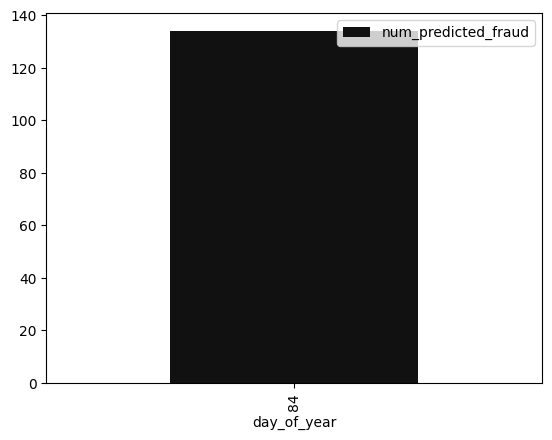

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
